# Importing libraries and dataset

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset

apple = pd.read_csv('Desktop/applestock.csv')

#Checking it imported

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


# 1. Check out the type of the columns.

In [3]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


# 2. Transform the date column as a datetime type.

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])

#Making sure I changed it correctly

print(apple.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


# 3. Set the date as the index.

In [5]:
apples = apple.set_index('Date', drop=True)

#Checking it worked correctly

apples.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


# 4. Are there any duplicate dates?

In [6]:
print(apples.index.duplicated())

[False False False ... False False False]


# 5. Sort the index so the first entry is the oldest date.

In [7]:
apples = apples.sort_index()

#Checking it sorted

print(apples)

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
...           ...    ...    ...    ...        ...        ...
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35

[8465 rows x 6 columns]


# 6. Get the last business day of each month.

In [35]:
from pandas.tseries.offsets import BMonthEnd, CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday

# Creating a sample dataframe with dates

df = pd.DataFrame({'date': pd.date_range('1980-12-12', '2014-07-08', freq='D')})

# Getting the last business day of each month

last_business_days = [d - pd.offsets.BDay() for d in df['date'] + pd.offsets.MonthEnd(0)]

# Adding a new column to the dataframe with the last business day of each month

df['last_business_day'] = [d - bday for d in last_business_days]

#Making sure it worked correctly

print(df[['date', 'last_business_day']])

            date last_business_day
0     1980-12-12        1980-12-29
1     1980-12-13        1980-12-29
2     1980-12-14        1980-12-29
3     1980-12-15        1980-12-29
4     1980-12-16        1980-12-29
...          ...               ...
12257 2014-07-04        2014-07-29
12258 2014-07-05        2014-07-29
12259 2014-07-06        2014-07-29
12260 2014-07-07        2014-07-29
12261 2014-07-08        2014-07-29

[12262 rows x 2 columns]


# 7. What is the difference in days between the first day and the oldest?

In [36]:
# Getting the oldest date 
oldest_date = apple['Date'].min()

# Getting the newest date 
newest_date = apple['Date'].max()

# Calculating the difference
difference = newest_date - oldest_date

# Calculate the difference using timedelta method
difference_td = difference.days

# Print the difference
print(difference_td)

12261


# 8. How many months in the data do we have?

In [19]:
# Creating a sample DataFrame with dates
dates = pd.date_range(start='1980-12-12', end='2014-07-08', freq='D')
df = pd.DataFrame({'Date': dates})

# Creating a new column with year and month information
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

# Grouping the DataFrame by YearMonth and count the number of unique values
number_months = df.groupby('YearMonth')['Date'].nunique().count()

print(number_months)

404


# 9. Plot the 'Adj Close' value.

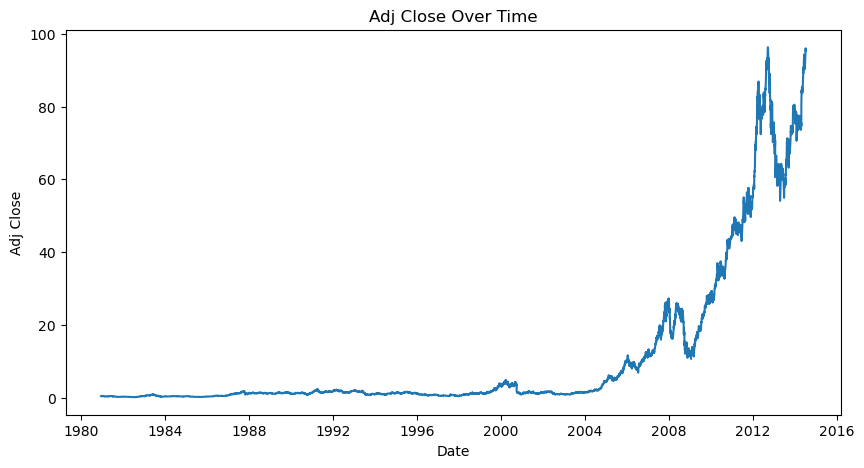

In [20]:
plt.figure(figsize=(10,5))
plt.plot(apple['Date'], apple['Adj Close'])
plt.title('Adj Close Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

# 10. Create your own question and answer it. Create a plot that shows the highs and lows.

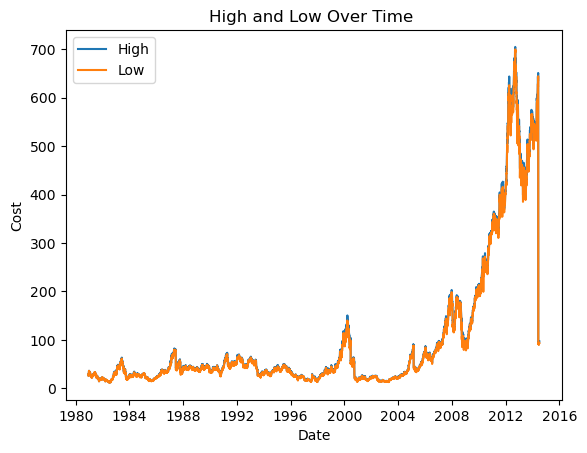

In [21]:
plt.plot(apple['Date'], apple['High'], label='High')
plt.plot(apple['Date'], apple['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.title('High and Low Over Time ')
plt.legend()
plt.show()